In [2]:
import tensorflow as tf
import os
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Activation, MaxPooling2D, BatchNormalization,
    Input, Dropout, Dense, Flatten,
    GlobalAveragePooling2D, Reshape)
from tensorflow.keras.preprocessing import image

# Data Preparation

In [ ]:
import os
import shutil
import random

# Paths
dataset_dir = "defect-classification-in-stem-images-main\\Image Data\\DataSet_CdTe"  # original dataset
train_dir = "train"
val_dir = "validation"
test_dir = "test"

# Split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Create train, validation, and test directories 
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over subfolders
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.isdir(subfolder_path):
        
        # Create corresponding subfolders in train, validation, and test
        train_subfolder = os.path.join(train_dir, subfolder)
        val_subfolder = os.path.join(val_dir, subfolder)
        test_subfolder = os.path.join(test_dir, subfolder)
        os.makedirs(train_subfolder, exist_ok=True)
        os.makedirs(val_subfolder, exist_ok=True)
        os.makedirs(test_subfolder, exist_ok=True)

        # List all files in the subfolder
        files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        random.shuffle(files)  # shuffle the files

        # Compute split indices
        total_files = len(files)
        train_end = int(total_files * train_ratio)
        val_end = train_end + int(total_files * val_ratio)

        # Split files
        train_files = files[:train_end]
        val_files = files[train_end:val_end]
        test_files = files[val_end:]

        # Copy files to respective folders
        for f in train_files:
            shutil.copy(os.path.join(subfolder_path, f), os.path.join(train_subfolder, f))
        for f in val_files:
            shutil.copy(os.path.join(subfolder_path, f), os.path.join(val_subfolder, f))
        for f in test_files:
            shutil.copy(os.path.join(subfolder_path, f), os.path.join(test_subfolder, f))

print("Dataset split into train, validation, and test completed!")


# Model for CdTe

In [28]:
test_dir = r"C:\Users\sous5\Desktop\Claudia 2025\Hackaton\dataset surabhi\CdTe\test"
val_dir = r"C:\Users\sous5\Desktop\Claudia 2025\Hackaton\dataset surabhi\CdTe\validation"
train_dir = r"C:\Users\sous5\Desktop\Claudia 2025\Hackaton\dataset surabhi\CdTe\train"

#change to your own paths

Text(0.5, 1.0, 'Distribution across classes')

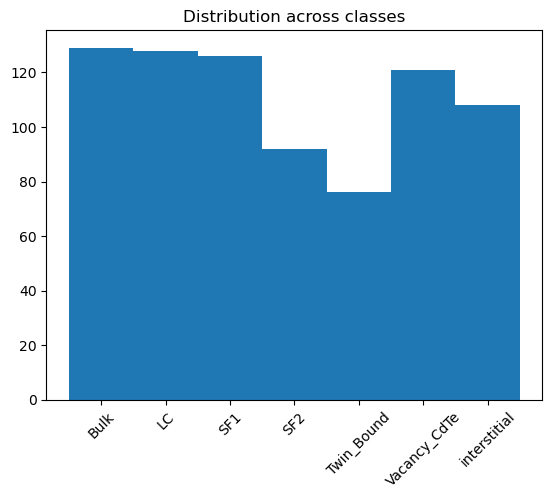

In [29]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

y_train = []
images = []
flat_data = []

categories = ['Bulk', 'LC', 'SF1', 'SF2', 'Twin_Bound', 'Vacancy_CdTe', 'interstitial']
for category in categories:
    class_num = categories.index(category) #label encoding the values
    path = os.path.join(train_dir, category) # create path to use all the images
    for img in os.listdir(path):
        y_train.append(class_num)

y_train = np.array(y_train)
unique, count = np.unique(y_train, return_counts = True)
plt.bar(categories, count, width=1)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Distribution across classes')

Text(0.5, 1.0, 'Distribution across classes')

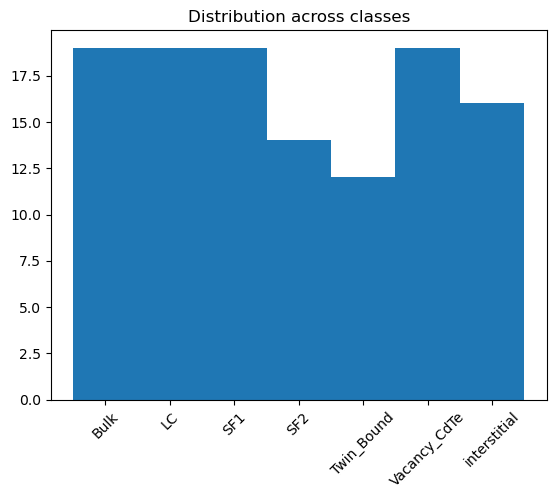

In [30]:
y_test = []
categories = ['Bulk', 'LC', 'SF1', 'SF2', 'Twin_Bound', 'Vacancy_CdTe', 'interstitial']
for category in categories:
    class_num = categories.index(category) #label encoding the values
    path = os.path.join(test_dir, category) # create path to use all the images
    for img in os.listdir(path):
        y_test.append(class_num)

y_test = np.array(y_test)
unique, count = np.unique(y_test, return_counts = True)
plt.bar(categories, count, width=1)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Distribution across classes')

Text(0.5, 1.0, 'Distribution across classes')

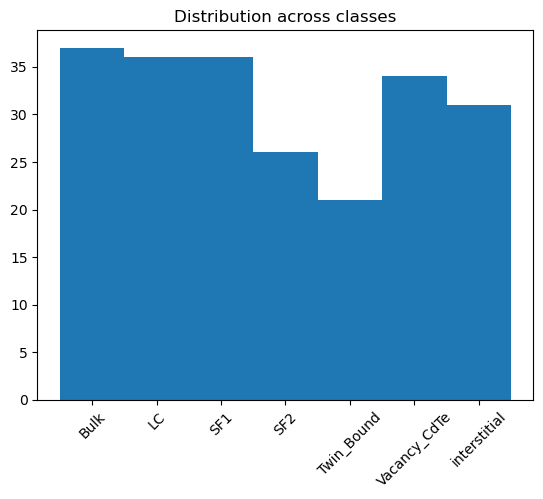

In [31]:
y_val = []
categories = ['Bulk', 'LC', 'SF1', 'SF2', 'Twin_Bound', 'Vacancy_CdTe', 'interstitial']
for category in categories:
    class_num = categories.index(category) #label encoding the values
    path = os.path.join(val_dir, category) # create path to use all the images
    for img in os.listdir(path):
        y_val.append(class_num)

y_val = np.array(y_val)
unique, count = np.unique(y_val, return_counts = True)
plt.bar(categories, count, width=1)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Distribution across classes')


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True,
                                    vertical_flip=False)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_dir,
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
print(training_set.class_indices)

Found 780 images belonging to 7 classes.
Found 118 images belonging to 7 classes.
Found 221 images belonging to 7 classes.
{'Bulk': 0, 'LC': 1, 'SF1': 2, 'SF2': 3, 'Twin_Bound': 4, 'Vacancy_CdTe': 5, 'interstitial': 6}


In [38]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

In [39]:
mobilenetv2 = keras.applications.mobilenet_v2.MobileNetV2(
    include_top = False,
    input_shape = (224,224,3)
    )
mobilenetv2.trainable = True

for layer in mobilenetv2.layers[:-40]:
    layer.trainable = False


input_layer = keras.Input(shape = (224,224,3))
x = mobilenetv2(input_layer,training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(512,activation='relu')(x)
output_layer = keras.layers.Dense(7,activation="softmax")(x)
model = Model(inputs = input_layer, outputs = output_layer)

In [40]:
model.compile(loss="CategoricalCrossentropy", metrics=["accuracy", "Recall", "Precision"], optimizer=keras.optimizers.Adam(learning_rate=0.001
                                                                                                                           , beta_1=0.9, beta_2=0.999,amsgrad=False))

In [26]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=7)

hist = model.fit(
    training_set,
    validation_data=val_set,
    epochs=25,
    callbacks=[early_stop]
)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - Precision: 0.8258 - Recall: 0.5833 - accuracy: 0.6833 - loss: 0.8516 - val_Precision: 0.3333 - val_Recall: 0.1674 - val_accuracy: 0.2036 - val_loss: 2.8600
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - Precision: 0.9551 - Recall: 0.9269 - accuracy: 0.9410 - loss: 0.2115 - val_Precision: 0.2329 - val_Recall: 0.2308 - val_accuracy: 0.2308 - val_loss: 4.2366
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - Precision: 0.9519 - Recall: 0.9385 - accuracy: 0.9474 - loss: 0.1708 - val_Precision: 0.1403 - val_Recall: 0.1403 - val_accuracy: 0.1403 - val_loss: 17.9966
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - Precision: 0.9610 - Recall: 0.9474 - accuracy: 0.9551 - loss: 0.1466 - val_Precision: 0.1403 - val_Recall: 0.1403 - val_accuracy: 0.1403 - val_loss: 25.8265
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - Precision: 0.9675 - Recall: 0.9551 - accuracy: 0.9603 - loss: 0.1376 - val_Precision: 0.1765 - val_Recall: 0.1765 

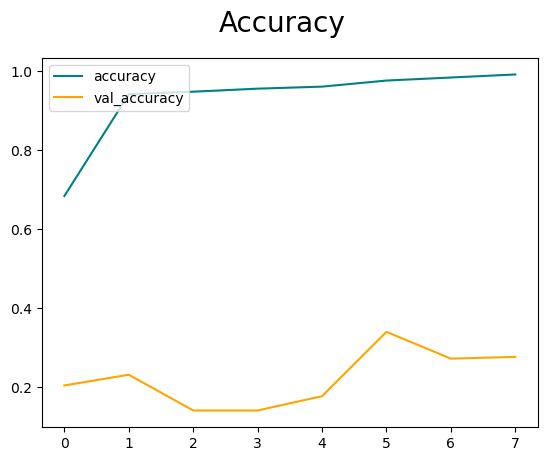

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color= 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

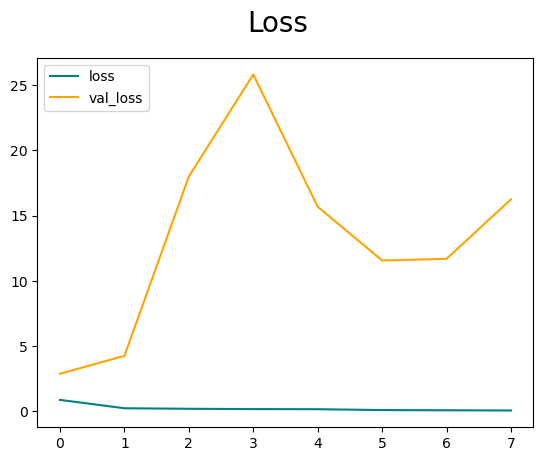

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()